# Chess Datasets Download
make sure to have kaggle.json credentials in same dir as this notebook

In [7]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory '/home/tamiroffen/.kaggle': File exists


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# makes and saves train / valid / test datasets under folder_name
def create_datasets(dataset_path, folder_name,  random_state, train_frac, valid_frac):
    # load the entire dataset
    data = pd.read_csv(dataset_path)
    
    # shuffle the data
    data = data.sample(frac=1, random_state=random_state)
    
    # determine the sizes for train, validation, and test sets
    total_size = len(data)
    train_size = int(train_frac * total_size)
    valid_size = int(valid_frac * total_size)
    test_size = total_size - train_size - valid_size
    
    # split the data into train, validation, and test sets
    train_data, temp_data = train_test_split(data, train_size=train_size, random_state=random_state)
    valid_data, test_data = train_test_split(temp_data, train_size=valid_size, random_state=random_state)
    
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # save the splits as separate CSV files
    train_data.to_csv(f'{folder_name}/train_dataset.csv', index=False)
    valid_data.to_csv(f'{folder_name}/valid_dataset.csv', index=False)
    test_data.to_csv(f'{folder_name}/test_dataset.csv', index=False)
    

## Chess Dataset for chess playing model: chess_games.csv
useful columns:
* WhiteElo
* BlackElo
* AN: Game moves

In [13]:
! kaggle datasets download arevel/chess-games
! unzip -qq chess-games.zip

chess-games.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# splits up the dataset into train (70%), valid (15%), and test (15%).
create_datasets('chess_games.csv', 'chess_games', random_state=211621479, train_frac=0.7, valid_frac=0.15)


## Chess dataset for chess position eval model: random_evals.csv
Columns: 
* FEN: string chess board representation
* evaluation: stockfish 11 evaluation of board at depth 22

In [1]:
! kaggle datasets download ronakbadhe/chess-evaluations
! unzip -qq chess-evaluations.zip

chess-evaluations.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# splits up the dataset into train (70%), valid (15%), and test (15%).
create_datasets('random_evals.csv', 'chess_evals', random_state=211621479, train_frac=0.7, valid_frac=0.15)

train_df = pd.read_csv('chess_evals/train_dataset.csv')
valid_df = pd.read_csv('chess_evals/valid_dataset.csv')
test_df = pd.read_csv('chess_evals/test_dataset.csv')
print(f'train dataset length: {len(train_df)}')
print(f'valid dataset length: {len(valid_df)}')
print(f'test dataset length: {len(test_df)}')

train dataset length: 700191
valid dataset length: 150040
test dataset length: 150042


# Exploring the Chess Dataset

In [2]:
import pandas as pd

dataset is large (~4 gb), therefore we will load a small chunk first

In [12]:
chunk_size = 100
df_chunk = pd.read_csv('train_dataset.csv', nrows=chunk_size)
df_chunk.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Bullet tournament,kroupy,woA,1-0,2016.07.06,19:10:06,2103,1475,1.0,0.0,A02,Bird Opening,60+0,Normal,1. f4 g6 2. Nf3 Bg7 3. e4 e6 4. d3 Ne7 5. Nc3 ...
1,Bullet,AFONSINHO_PAPAI,spacemanjoe,0-1,2016.07.01,02:56:57,1455,1732,-4.0,4.0,B12,Caro-Kann Defense: Advance Variation,60+0,Time forfeit,1. e4 c6 2. e5 d5 3. d4 e6 4. Bf4 Bd7 5. Nf3 c...
2,Classical,maxevans4321,Magoggo,1-0,2016.07.13,10:50:55,1677,1642,10.0,-9.0,B00,Caro-Kann Defense: Hillbilly Attack,240+9,Normal,1. e4 c6 2. Bc4 d5 3. exd5 cxd5 4. Bb3 Bf5 5. ...
3,Blitz,EchecsEtSuccess,Sampaio,0-1,2016.07.26,19:35:50,1895,1805,-13.0,14.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+2,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
4,Classical,lexx,natalinka18,0-1,2016.07.04,16:24:47,2108,2106,-11.0,13.0,C01,French Defense: Exchange Variation,1200+10,Normal,1. e4 { [%eval 0.12] } 1... e6 { [%eval 0.26] ...


'AN' (algebriac notation) is the moves, formatted as a string.
* Algebraic notation in chess uses a format where the name of the piece making the move is followed by the destination square to succinctly describe each move, such as "Pawn moves to e4" or "Knight to f3."

In [18]:
print("Example Moves")
game1_moves = df_chunk['AN'][0]
print("AN:", game1_moves)
print(type(game1_moves))

Example Moves
AN: 1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e4 6. Ne5 cxd5 7. Qa4+ Bd7 8. Nxd7 Nxd7 9. Nc3 Nf6 10. Qb3 Be7 11. Nxd5 Qa5+ 12. Nc3 O-O 13. Be2 b5 14. O-O Rad8 15. Bd2 Qc7 16. Rac1 Qd6 17. Qc2 Qe6 18. Nb1 Bd6 19. a3 Nb6 20. Qc6 Nfd5 21. Ba5 Rc8 22. Qb7 Qh6 23. h3 Nc4 24. Bxc4 bxc4 25. Qxd5 Rfd8 26. Qxe4 Rd7 27. Bc3 Re7 28. Qf3 Re6 29. Nd2 Rf6 30. Qg4 Re8 31. Ne4 Rg6 32. Qd7 Rf8 33. Nxd6 Rxd6 34. Qc7 Rg6 35. Qh2 Re8 36. d5 f6 37. d6 Rd8 38. Rfd1 1-0
<class 'str'>


'Opening' is interesting (no null values), 'ECO' is related to this

In [21]:
print("Openings and their frequency")
print(df_chunk['Opening'].value_counts())

Openings and their frequency
Opening
Scandinavian Defense: Mieses-Kotroc Variation                 3
Van't Kruijs Opening                                          3
Ruy Lopez: Steinitz Defense                                   2
Indian Game                                                   2
Italian Game: Two Knights Defense, Modern Bishop's Opening    2
                                                             ..
Horwitz Defense                                               1
Pirc Defense: Roscher Gambit                                  1
Ruy Lopez: Classical Variation                                1
French Defense: Normal Variation                              1
Blackmar-Diemer Gambit: Rasa-Studier Gambit                   1
Name: count, Length: 87, dtype: int64


Stats about the white players in our dataset

In [26]:
print("White Elo Statistics")
print(df_chunk['WhiteElo'].describe())

White Elo Statistics
count     100.000000
mean     1725.680000
std       213.062085
min      1155.000000
25%      1585.500000
50%      1747.500000
75%      1876.750000
max      2215.000000
Name: WhiteElo, dtype: float64


'Termination' = reason why game stopped (not too interesting for our CNN)

In [27]:
print(df_chunk['Termination'].value_counts())

Termination
Normal          70
Time forfeit    28
Abandoned        2
Name: count, dtype: int64


# Chess Package

beginning board position: upper case is white, lower case is black
<class 'chess.Board'>
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
legal moves in 2 formats:
uci: ['g1h3', 'g1f3', 'b1c3', 'b1a3', 'h2h3', 'g2g3', 'f2f3', 'e2e3', 'd2d3', 'c2c3', 'b2b3', 'a2a3', 'h2h4', 'g2g4', 'f2f4', 'e2e4', 'd2d4', 'c2c4', 'b2b4', 'a2a4']
san: ['Nh3', 'Nf3', 'Nc3', 'Na3', 'h3', 'g3', 'f3', 'e3', 'd3', 'c3', 'b3', 'a3', 'h4', 'g4', 'f4', 'e4', 'd4', 'c4', 'b4', 'a4']

Scholar's mate
r . b q k b . r
p p p p . Q p p
. . n . . n . .
. . . . p . . .
. . B . P . . .
. . . . . . . .
P P P P . P P P
R N B . K . N R
checkmate? True

graphic layout


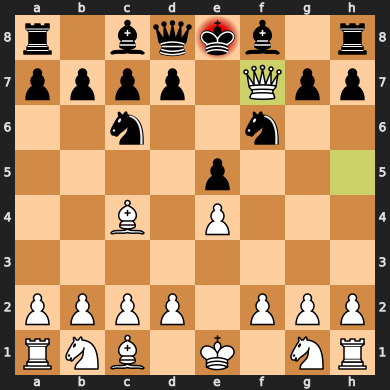

In [29]:
import chess

board = chess.Board()
print("beginning board position: upper case is white, lower case is black")
print(type(board))
print(board)

print("legal moves in 2 formats:")
init_moves_uci = [move.uci() for move in board.legal_moves]
init_moves_san = [board.san(move) for move in board.legal_moves]
print("uci:",init_moves_uci)
print("san:",init_moves_san)
print()

print("Scholar's mate")
# game: (players take turn making moves)
board.push_san("e4")
board.push_san("e5")
board.push_san("Qh5")
board.push_san("Nc6")
board.push_san("Bc4")
board.push_san("Nf6")
board.push_san("Qf7")
print(board)
print("checkmate?", board.is_checkmate())
print()

# nice print graphic of the board:
print("graphic layout")
display(board)